**Project description**

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
You'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency. 

<a id="0"></a> <br>
 # Table of Contents     
1. [Initialization](#7)      
    1. [Load data](#12)       
    1. [Explore initial data and information](#12)   
    1. [Fix missing data and enrich data](#12)       
1. [General conclusion](#12)
1. [Data analysis (Hypothesis)](#12) 
1. [Explanation](#12) 

## Initialization

In [58]:
# Loading all the libraries

import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

### Load data

In [59]:
# Load the data files into different DataFrames

taxi = pd.read_csv('/datasets/project_sql_result_01.csv')
trip = pd.read_csv('/datasets/project_sql_result_04.csv')
ride = pd.read_csv('/datasets/project_sql_result_07.csv')

### Explore initial data and information

In [60]:
# Print the general/summary information about the plans' DataFrame
taxi.info()
print()
print()
trip.info()
print()
print()
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duratio

In [61]:
taxi.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [62]:
trip.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [63]:
ride.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


### Fix missing data and enrich data

In [64]:
taxi.duplicated().sum()

0

In [65]:
trip.duplicated().sum()

0

In [66]:
# Identify missing values
missing_values = taxi.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing value counts in each column:")
print(missing_counts)

Missing value counts in each column:
company_name    0
trips_amount    0
dtype: int64


In [67]:
# Identify missing values
missing_values = trip.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing value counts in each column:")
print(missing_counts)

Missing value counts in each column:
dropoff_location_name    0
average_trips            0
dtype: int64


In [68]:
taxi.sort_values("trips_amount", ascending = False).head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [69]:
trip.sort_values("average_trips", ascending = False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


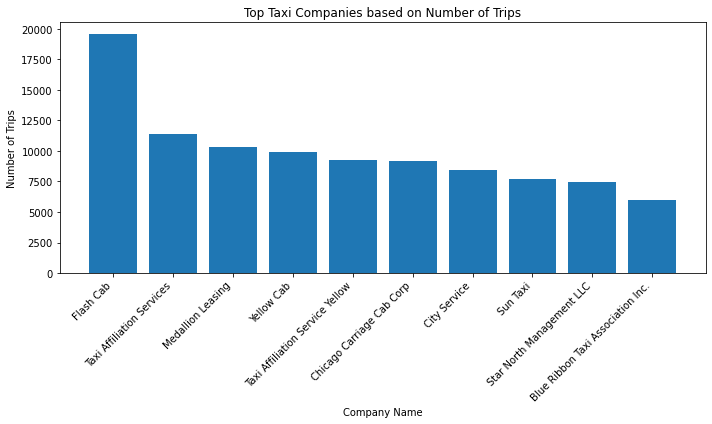

In [70]:
top_taxi = taxi.sort_values("trips_amount", ascending=False).head(10)

plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
plt.bar(top_taxi['company_name'], top_taxi['trips_amount'])
plt.xlabel('Company Name')
plt.ylabel('Number of Trips')
plt.title('Top Taxi Companies based on Number of Trips')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent cropping of labels

plt.show()

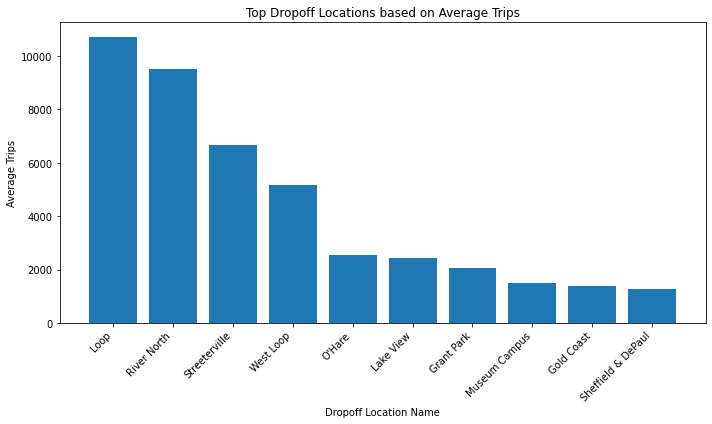

In [71]:
top_trip = trip.sort_values("average_trips", ascending=False).head(10)

plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
plt.bar(top_trip['dropoff_location_name'], top_trip['average_trips'])
plt.xlabel('Dropoff Location Name')
plt.ylabel('Average Trips')
plt.title('Top Dropoff Locations based on Average Trips')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent cropping of labels

plt.show()

## General Conclusion

**Top Taxi Companies based on Number of Trips:**

>Flash Cab is the leading company with 19,558 trips, followed by Taxi Affiliation Services (11,422 trips), and Medallion Leasing (10,367 trips).

>The disparity in the number of trips between these top companies is significant, showcasing a dominant player in Flash Cab compared to others.

**Top Dropoff Locations based on Average Trips:**

>The Loop area stands out with the highest average of around 10,727 trips, followed by River North (9,524 trips), and Streeterville (6,665 trips).

>There's a significant disparity between the top locations and the rest, highlighting popular areas for taxi dropoffs.

**General Observations:**

>Flash Cab stands out prominently in the taxi companies' graph, suggesting it's a major player in the market, making significantly more trips than others.

>The dropoff locations' graph highlights certain areas like The Loop, River North, and Streeterville as major taxi dropoff points with a considerably higher average number of trips compared to others.

---------------------------------------------------------------------------------------------------------------------------

## Data Analysis (Hypothesis)

In [72]:
# Convert 'start_ts' column to datetime format
ride['start_ts'] = pd.to_datetime(ride['start_ts'])

# Separate 'start_ts' into 'date' and 'time' columns
ride['date'] = ride['start_ts'].dt.date
ride['time'] = ride['start_ts'].dt.time

# Display the DataFrame with new 'date' and 'time' columns
display(ride)

,start_ts,weather_conditions,duration_seconds,date,time
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00
...,...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,2017-11-25,11:00:00
1064,2017-11-11 10:00:00,Good,1318.0,2017-11-11,10:00:00
1065,2017-11-11 13:00:00,Good,2100.0,2017-11-11,13:00:00
1066,2017-11-11 08:00:00,Good,1380.0,2017-11-11,08:00:00


In [76]:
# Create 'weather_numeric' column in the 'ride' DataFrame using np.where
ride['weather_numeric'] = np.where(ride['weather_conditions'] == 'Good', 1, 0)

# Display the updated 'ride' DataFrame
display(ride.head())

,start_ts,weather_conditions,duration_seconds,date,time,weather_numeric
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00,1
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00,1
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00,1
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00,1
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00,1


In [83]:
# Convert 'date' column to datetime format if it's in string format
ride['date'] = pd.to_datetime(ride['date'])

# Remove rows with missing or non-numeric values in 'duration_seconds'
ride = ride[pd.to_numeric(ride['duration_seconds'], errors='coerce').notnull()]

# Select data for rides from the Loop to O'Hare International Airport on Saturdays
loop_to_ohare = ride[(ride['weather_numeric'] == 0) & (ride['date'].dt.dayofweek == 5)]  # Assuming 'weather_numeric' uses 0 for 'Bad'

# Split data into rainy and non-rainy Saturdays
rainy_saturdays = loop_to_ohare
non_rainy_saturdays = ride[(ride['date'].dt.dayofweek == 5) & (ride['weather_numeric'] == 1)]  # Assuming 'weather_numeric' uses 1 for 'Good'

# Perform a two-sample t-test
t_stat, p_val = ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'], equal_var=False, nan_policy='omit')

# Define the significance level (alpha)
alpha = 0.05

# Display the calculated p-value
print(f"P-Value: {p_val:.3f}")

# Decision based on p-value
if pd.notnull(p_val) and p_val < alpha:
    
    print("Reject the null hypothesis. There is a significant difference in ride durations between rainy and non-rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ride durations between rainy and non-rainy Saturdays.")


P-Value: 0.000
Reject the null hypothesis. There is a significant difference in ride durations between rainy and non-rainy Saturdays.


## Explanation

**How you formed the null and alternative hypotheses:**

>>Null Hypothesis (H0):The null hypothesis typically states that there is no effect or no difference, suggesting that any observed difference in ride durations between rainy and non-rainy Saturdays is due to random variation.

>> This might suggest, "there is no significant difference in ride durations between rainy and non-rainy Saturdays from the Loop to O'Hare International Airport"

>>Alternative Hypothesis (H1): The alternative hypothesis counters the null hypothesis, proposing that there is a statistically significant effect or difference present in the data.

>> This maybe, "there is a significant difference in ride durations between rainy and non-rainy Saturdays from the Loop to O'Hare International Airport."

**What criterion you used to test the hypotheses and why:**

>The criterion employed here is a two-sample t-test (independent samples t-test) with the assumption of unequal variances (equal_var=False). 

>A significance level (alpha) of 0.05 is chosen. The t-test assesses whether the means of the ride durations for rainy and non-rainy Saturdays are significantly different.